<a href="https://colab.research.google.com/github/mohansharma077/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

In [42]:
df_sms=pd.read_csv('/content/drive/MyDrive/spam(1).csv',encoding='latin-1')

In [43]:
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
#Dropping the unwanted columns Unnamed:2, Unnamed: 3 and Unnamed:4

In [45]:
df_sms=df_sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df_sms=df_sms.rename(columns={"v1":'label','v2':'sms'})

In [46]:
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
# Number of observations in each label spam and ham

In [48]:
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [49]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [50]:
df_sms['length']=df_sms['sms'].apply(len)
df_sms['length']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: length, Length: 5572, dtype: int64

In [51]:
import matplotlib.pyplot as plt

(array([1.660e+02, 1.463e+03, 1.005e+03, 6.160e+02, 4.500e+02, 2.970e+02,
        3.190e+02, 3.960e+02, 6.470e+02, 7.600e+01, 2.700e+01, 1.500e+01,
        1.800e+01, 1.200e+01, 7.000e+00, 1.700e+01, 8.000e+00, 4.000e+00,
        5.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

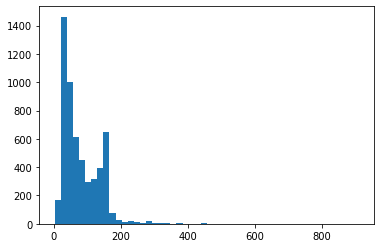

In [52]:
plt.hist(df_sms['length'],bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f423cb1f5b0>,
      dtype=object)

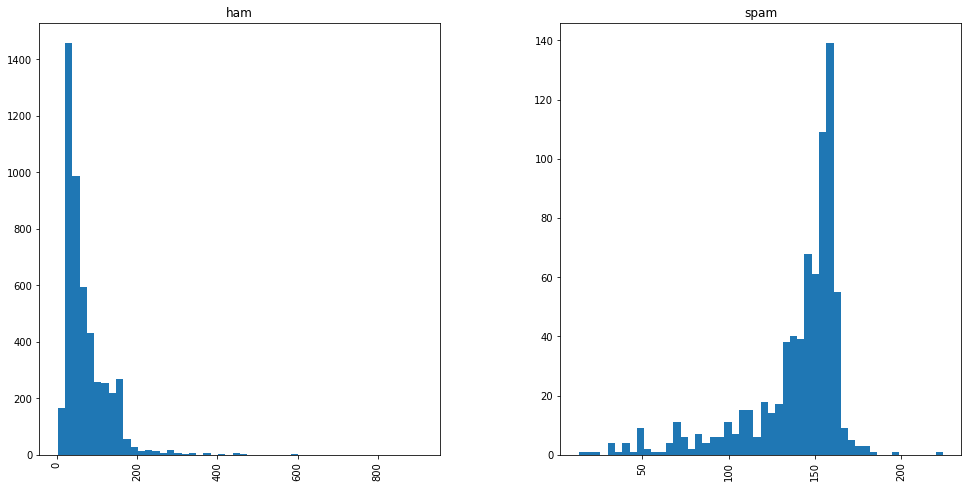

In [53]:
df_sms.hist(column='length',by='label',bins=50,figsize=(16,8))

In [55]:
df_sms.loc[:,'label']=df_sms.label.map({'ham':0,'spam':1})
df_sms['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [56]:
df_sms.isna().sum()

label     0
sms       0
length    0
dtype: int64

In [57]:
#implementation of bag of words appraoch
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [59]:
#Removing all punctuations
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [66]:
#tokenization
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [70]:
#Count frequencies
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [72]:
#Implementing Bag of Words in scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [74]:
#Data preprocessing with CountVectorizer()
count_vector.fit(documents)
count_vector.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [79]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [80]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

In [83]:
count_vector = CountVectorizer()

In [84]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [87]:
#Implementation of Naive Bayes Machine Learning Algorithm
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
predictions = naive_bayes.predict(testing_data)


In [88]:
#Evaluating our SMS Spam Detection Model

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652
